In [9]:
#importing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [3]:
#loading Dataset
diabetes_dataset=pd.read_csv("diabetes-dataset.csv")
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
diabetes_dataset.shape

(2000, 9)

In [5]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [6]:
diabetes_dataset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Outlier Detection

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Insulin'>

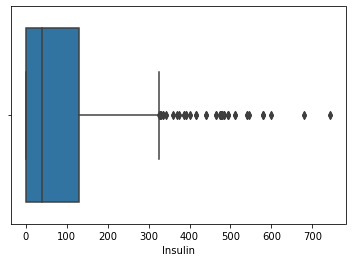

In [10]:
f1 = diabetes_dataset['Insulin']
sns.boxplot(f1)

In [11]:
#standard deviation
std = diabetes_dataset.Insulin.std()
mean = diabetes_dataset.Insulin.mean()

upperL = mean+(3*std)
lowerL = mean-(3*std)

ddf = diabetes_dataset[(diabetes_dataset.Insulin > lowerL) & (diabetes_dataset.Insulin < upperL)]
ddf.shape

(1952, 9)

In [12]:
ddf["Outcome"].value_counts()

0    1297
1     655
Name: Outcome, dtype: int64

In [13]:
ddf.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.188897,109.960678,68.016191,19.830378,63.981496,30.452968,0.431388,31.164996
1,4.777099,140.566412,71.053435,22.088550,80.638168,35.275725,0.536531,37.125191


In [14]:
X = ddf.drop(columns ='Outcome', axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138,62,35,0,33.6,0.127,47
1,0,84,82,31,125,38.2,0.233,23
2,0,145,0,0,0,44.2,0.630,31
3,0,135,68,42,250,42.3,0.365,24
5,0,173,78,32,265,46.5,1.159,58
...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33
1996,8,179,72,42,130,32.7,0.719,36
1997,6,85,78,0,0,31.2,0.382,42
1998,0,129,110,46,130,67.1,0.319,26


In [15]:
Y = ddf["Outcome"]
Y

0       1
1       0
2       1
3       1
5       0
       ..
1995    0
1996    1
1997    0
1998    1
1999    0
Name: Outcome, Length: 1952, dtype: int64

In [16]:
scaler = StandardScaler()
s_diab = scaler.fit_transform (X)
s_diabdf = pd.DataFrame(data=s_diab, columns=X.columns)
s_diabdf

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.519247,0.559844,-0.364107,0.896811,-0.789539,0.187475,-1.084545,1.172607
1,-1.122382,-1.141477,0.670972,0.647903,0.629052,0.751589,-0.746093,-0.861544
2,-1.122382,0.780385,-3.572850,-1.281141,-0.789539,1.487390,0.521507,-0.183494
3,-1.122382,0.465326,-0.053583,1.332402,2.047644,1.254387,-0.324624,-0.776788
4,-1.122382,1.662552,0.463956,0.710130,2.217875,1.769448,2.210576,2.104926
...,...,...,...,...,...,...,...,...
1947,-0.519247,-1.425031,-0.260599,0.212312,-0.165359,-0.290796,-0.308659,-0.013981
1948,1.290161,1.851587,0.153432,1.332402,0.685796,0.077105,0.805679,0.240288
1949,0.687025,-1.109971,0.463956,-1.281141,-0.789539,-0.106846,-0.270344,0.748825
1950,-1.122382,0.276290,2.120082,1.581311,0.685796,4.295699,-0.471499,-0.607275


In [17]:
X = s_diabdf
Y = ddf['Outcome']
print(X)
print(Y)

      Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       -0.519247  0.559844      -0.364107       0.896811 -0.789539  0.187475   
1       -1.122382 -1.141477       0.670972       0.647903  0.629052  0.751589   
2       -1.122382  0.780385      -3.572850      -1.281141 -0.789539  1.487390   
3       -1.122382  0.465326      -0.053583       1.332402  2.047644  1.254387   
4       -1.122382  1.662552       0.463956       0.710130  2.217875  1.769448   
...           ...       ...            ...            ...       ...       ...   
1947    -0.519247 -1.425031      -0.260599       0.212312 -0.165359 -0.290796   
1948     1.290161  1.851587       0.153432       1.332402  0.685796  0.077105   
1949     0.687025 -1.109971       0.463956      -1.281141 -0.789539 -0.106846   
1950    -1.122382  0.276290       2.120082       1.581311  0.685796  4.295699   
1951    -0.519247 -1.235995       0.153432      -0.347733  0.072964 -0.241743   

      DiabetesPedigreeFunct

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify = Y,random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(1952, 8) (1561, 8) (391, 8)


In [19]:
#Pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [20]:
numeric_cols = X.select_dtypes(include=['int64','float64']).columns
print(numeric_cols)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [21]:
#Building the Numeric Transformation Pipeline
n_transformer = Pipeline(steps=
                       [
                           ('imputeN',SimpleImputer(strategy='mean')),
                           ('scale',StandardScaler())
                       ])

In [22]:
from sklearn.compose import ColumnTransformer
preprocessing = ColumnTransformer(transformers=
                       [
                           ('numeric',n_transformer,numeric_cols)
                       ])

In [23]:
#Create estimator
estimator = svm.SVC(kernel='linear')

In [24]:
Diabetesmodel = Pipeline(steps=
                  [
                      ('pre',preprocessing),
                      ('est',estimator)
                  ])

In [25]:
from sklearn import set_config
set_config(display='diagram')
Diabetesmodel.fit(X_train,Y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object'))])),
                ('est', SVC(kernel='linear'))])

In [26]:
# Model Training 
#classifier = svm.SVC(kernel='linear')
#classifier.fit(X_train, Y_train)


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import seaborn as sns
y_hat = Diabetesmodel.predict(X_test)
#sns.heatmap(confusion_matrix(y_hat,Y_test),annot=True)
report = classification_report(Y_test, y_hat)
print("Report : \n{}".format(report))

Report : 
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       260
           1       0.82      0.56      0.66       131

    accuracy                           0.81       391
   macro avg       0.81      0.75      0.77       391
weighted avg       0.81      0.81      0.80       391



In [27]:
#Accuracy(training)
X_train_prediction = Diabetesmodel.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
training_data_accuracy

0.7783472133247918

In [28]:
# accuracy score on the test data
X_test_prediction = Diabetesmodel.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
test_data_accuracy

0.8107416879795396

In [29]:
# input_data = (5,166,72,19,175,25.8,0.587,51)

# # changing the input_data to numpy array
# input_data_as_numpy_array = np.asarray(input_data)

# # reshape the array as we are predicting for one instance
# input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# # standardize the input data
# std_data = scaler.transform(input_data_reshaped)
# print(std_data)

# prediction = Diabetesmodel.predict(std_data)
# print(prediction)

# if (prediction[0] == 0):
#   print('The person is not diabetic')
# else:
#   print('The person is diabetic')
sample = X_test.iloc[0:1,:]
sample

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
1442,-0.820815,-0.038769,0.981495,1.270175,1.139745,1.622287,0.128775,-0.607275


In [30]:
Diabetesmodel.predict(sample)[0]

0

In [31]:
import pickle 

In [32]:
diabetesfile = 'diabetes_model.sav'
pickle.dump(Diabetesmodel, open(diabetesfile, 'wb'))

In [33]:
loaded_model = pickle.load(open('diabetes_model.sav', 'rb'))

In [34]:
loaded_model.score(X_test,Y_test)

0.8107416879795396